In [9]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pandas
!apt-get install -y stockfish
!pip install python-chess



import pandas as pd
import os
import chess
import chess.engine
df = pd.read_csv('/content/drive/MyDrive/Saturdays/merged_sequences.csv')
filtro = (df['EVAL'] > 200) | (df['EVAL'] < -200)
df = df[filtro]
df = df[['SEQUENCE', 'Themes']]
df[:10]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
stockfish is already the newest version (11-1build1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


TypeError: ignored

In [10]:
#def load_and_process_data(filepath):
#    df = pd.read_csv(filepath)
#
#    # Transform the 'SEQUENCE' column into arrays of FENs
#    df['SEQUENCE'] = df['SEQUENCE'].apply(lambda x: [' '.join(x.split()[i:i+6]) for i in range(0, len(x.split()), 6)])
#
#    # Transform the 'Themes' column into arrays of themes
#    df['Themes'] = df['Themes'].apply(lambda x: x.split())
#
#    return df
#
#df = load_and_process_data('/content/drive/MyDrive/Saturdays/merged_sequences.csv')

import re

def load_and_process_data(filepath):
    df = pd.read_csv(filepath)
    df['EVAL'] = df['EVAL'].replace('None', '5000')
    df['EVAL'] = df['EVAL'].astype(int)
    df[:30]

    filtro = (df['EVAL'] > 200) | (df['EVAL'] < -200)
    df = df[filtro]
    print(df)

    # Keep only the needed columns
    df = df[['SEQUENCE', 'Themes']]

    # Use a regular expression to split the 'SEQUENCE' column into arrays of FENs
    df['SEQUENCE'] = df['SEQUENCE'].apply(lambda x: re.findall(r'(\S+ \S+ \S+ \S+ \S+ \S+)', x))

    #e a lista
Estructura  Transform the 'Themes' column into arrays of themes
    df['Themes'] = df['Themes'].apply(lambda x: x.split())

    return df

df = load_and_process_data('/content/drive/MyDrive/Saturdays/merged_sequences.csv')

        Unnamed: 0                                           SEQUENCE  EVAL  \
0                0  r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...   392   
2                2  r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP...   294   
6                6  r1bqk2r/pp1nbNp1/2p1p2p/8/2BP4/1PN3P1/P3QP1P/3...  -859   
8                8  3R4/8/K7/pB2b3/1p6/1P2k3/3p4/8 w - - 4 58 8/8/...   679   
10              10  r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...   392   
...            ...                                                ...   ...   
631270     1099992  2kr1q1r/ppp5/2np1n1p/3Np1p1/4P3/6B1/PP3PPP/R2Q...   277   
631272     1099994  4Q3/6pk/3P3p/p7/2Q1Nr2/2P5/6PP/1q4K1 w - - 1 3...  5000   
631274     1099996  r4rk1/pbp1qp2/1p4p1/4p1N1/3nP1P1/4Q3/PP1N1P2/1...   808   
631275     1099997  1r1b1k2/1b3p2/4p1p1/4P3/1PpPNPPq/2P5/R2N2Q1/2K...   410   
631277     1099999  r6k/3b4/pp2p1B1/1P6/K1P2b2/2qp4/P5P1/R6Q b - -...  5000   

                                 Themes  
0        

In [11]:
print(df)

                                                 SEQUENCE  \
0       [r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b -...   
2       [r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NB...   
6       [r1bqk2r/pp1nbNp1/2p1p2p/8/2BP4/1PN3P1/P3QP1P/...   
8       [3R4/8/K7/pB2b3/1p6/1P2k3/3p4/8 w - - 4 58, 8/...   
10      [r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b -...   
...                                                   ...   
631270  [2kr1q1r/ppp5/2np1n1p/3Np1p1/4P3/6B1/PP3PPP/R2...   
631272  [4Q3/6pk/3P3p/p7/2Q1Nr2/2P5/6PP/1q4K1 w - - 1 ...   
631274  [r4rk1/pbp1qp2/1p4p1/4p1N1/3nP1P1/4Q3/PP1N1P2/...   
631275  [1r1b1k2/1b3p2/4p1p1/4P3/1PpPNPPq/2P5/R2N2Q1/2...   
631277  [r6k/3b4/pp2p1B1/1P6/K1P2b2/2qp4/P5P1/R6Q b - ...   

                                      Themes  
0           [hangingPiece, long, middlegame]  
2             [advantage, middlegame, short]  
6                  [middlegame, short, mate]  
8                     [endgame, fork, short]  
10          [hangingPiece, long,

In [12]:
print(df.columns)

Index(['SEQUENCE', 'Themes'], dtype='object')


In [13]:
import numpy as np

#All themes. If themes deleted or merged, process_themes and process_fen must be adapted
all_themes = [
    'advantage', 'hangingPiece', 'bodenMate', 'clearance', 'endgame', 'opening', 'defensiveMove',
    'oneMove', 'attackingF2F7', 'enPassant', 'kingsideAttack', 'castling', 'pawnEndgame', 'deflection', 'arabianMate',
    'interference', 'queenRookEndgame', 'mateIn5', 'smotheredMate', 'exposedKing', 'crushing', 'dovetailMate', 'hookMate',
    'knightEndgame', 'mateIn1', 'promotion', 'pin', 'masterVsMaster', 'backRankMate', 'attraction', 'equality',
    'veryLong', 'queensideAttack', 'bishopEndgame', 'middlegame', 'underPromotion', 'doubleCheck', 'queenEndgame', 'rookEndgame',
    'skewer', 'capturingDefender', 'superGM', 'zugzwang', 'long', 'anastasiaMate', 'intermezzo', 'short',
    'mateIn2', 'xRayAttack', 'discoveredAttack', 'master', 'mateIn3', 'mateIn4', 'mate', 'trappedPiece',
    'doubleBishopMate', 'fork', 'advancedPawn', 'quietMove', 'sacrifice']

# Mapping for pieces
piece_mapping = {'p':1, 'n':2, 'b':3, 'r':4, 'q':5, 'k':6, ' ':7,
                 'P':8, 'N':9, 'B':10,'R':11,'Q':12,'K':13}

# Mapping for en passant
square_mapping = {
    '-':0,
    'a8': 1, 'b8': 2, 'c8': 3, 'd8': 4, 'e8': 5, 'f8': 6, 'g8': 7, 'h8': 8,
    'a7': 9, 'b7': 10, 'c7': 11, 'd7': 12, 'e7': 13, 'f7': 14, 'g7': 15, 'h7': 16,
    'a6': 17, 'b6': 18, 'c6': 19, 'd6': 20, 'e6': 21, 'f6': 22, 'g6': 23, 'h6': 24,
    'a5': 25, 'b5': 26, 'c5': 27, 'd5': 28, 'e5': 29, 'f5': 30, 'g5': 31, 'h5': 32,
    'a4': 33, 'b4': 34, 'c4': 35, 'd4': 36, 'e4': 37, 'f4': 38, 'g4': 39, 'h4': 40,
    'a3': 41, 'b3': 42, 'c3': 43, 'd3': 44, 'e3': 45, 'f3': 46, 'g3': 47, 'h3': 48,
    'a2': 49, 'b2': 50, 'c2': 51, 'd2': 52, 'e2': 53, 'f2': 54, 'g2': 55, 'h2': 56,
    'a1': 57, 'b1': 58, 'c1': 59, 'd1': 60, 'e1': 61, 'f1': 62, 'g1': 63, 'h1': 64
}

def process_fen(fen_string):
    # Splitting FEN string into parts
    board, turn, castling, en_passant, _ , _ = fen_string.split()

    # Transforming board
    board = board.replace("/", "")  # removing slash
    for digit in "12345678":
        board = board.replace(digit, " " * int(digit))  # replace numbers with spaces
    board_values = [piece_mapping[piece] for piece in board]  # map pieces to numbers

    # Transforming metadata
    metadata = [1 if turn == 'b' else 0]
    metadata.extend([1 if c in castling else 0 for c in 'KQkq'])
    # Handle the case when there's no valid en passant target square
    metadata.append(square_mapping[en_passant] if en_passant in square_mapping else 0)
    metadata.extend([0, 0])  # two empty squares as per the requirement

    # Adding the board and metadata together
    fen_matrix = np.array(board_values + metadata).reshape((9, 8))

    return fen_matrix

#Generate the embedding vector for the themes
def process_themes(themes_string):
    return [1 if theme in themes_string else 0 for theme in all_themes]

#Transform FEN to 9x8 array where 1x8 is for metadata like castling, turn and en passant
def process_df_row(row):
    fen_matrix = process_fen(row['FEN'])
    themes = np.array(process_themes(row['Themes']))
    return fen_matrix, themes

#Process df and generate X and Y up to n rows
def generate_X_Y(df, n):
    # Apply processing functions to the first `n` rows of the dataframe
    results = df.iloc[:n].apply(process_df_row, axis=1)

    # Stack the resulting numpy arrays into a 3D array for X and a 2D array for Y
    X = np.stack(results.apply(lambda x: x[0]))
    Y = np.stack(results.apply(lambda x: x[1]))

    return X, Y

def process_fen_sequence(fen_sequence):
    # Check if the sequence is a string and split into individual FENs
    if isinstance(fen_sequence, str):
        fens = fen_sequence.split()
    # If it's a list, we can directly work with it
    elif isinstance(fen_sequence, list):
        fens = fen_sequence

    # Process each FEN individually
    processed_fens = [process_fen(fen) for fen in fens]

    # Pad the sequence if it's shorter than 10
    while len(processed_fens) < 10:
        processed_fens.append(processed_fens[-1])

    # Stack the processed FENs into a single array
    return np.stack(processed_fens)


def generate_X_Y_sequence(df, n):
    # Process the FEN sequences and theme sequences for the first `n` rows
    X_sequence = [process_fen_sequence(row['SEQUENCE']) for _, row in df.iloc[:n].iterrows()]
    Y_sequence = [process_themes(row['Themes']) for _, row in df.iloc[:n].iterrows()]

    # Stack the resulting arrays into a 3D array for X and a 2D array for Y
    X = np.stack(X_sequence)
    Y = np.stack(Y_sequence)

    return X, Y


In [17]:
X, Y = generate_X_Y_sequence(df,  131071)

In [18]:
X.shape

(131071, 10, 9, 8)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, Flatten, Dense, Dropout

# Define the shape of the inputs
input_shape = (10, 9, 8, 1)  # 10 boards, each 9x8, and 1 for grayscale

# Define the number of themes to predict
num_themes = len(all_themes)  # Adjust according to your needs

# Initialize the model
model = Sequential()

# Add some 3D convolutional layers
model.add(Conv3D(32, kernel_size=(3, 3, 3), activation='relu', padding='same', input_shape=input_shape))
model.add(Conv3D(64, kernel_size=(3, 3, 3), activation='relu', padding='same'))

# Flatten the output from the convolutional layers so it can be fed into the dense layers
model.add(Flatten())

# Add some dense layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))

# Add the output layer
# We use sigmoid activation function for multi-label classification
model.add(Dense(num_themes, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

# Print a summary of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_4 (Conv3D)           (None, 10, 9, 8, 32)      896       
                                                                 
 conv3d_5 (Conv3D)           (None, 10, 9, 8, 64)      55360     
                                                                 
 flatten_2 (Flatten)         (None, 46080)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               5898368   
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 60)               

In [ ]:
from sklearn.model_selection import train_test_split

# First, generate X and Y
train_X, train_Y = generate_X_Y_sequence(df, n=131071)
#train_X, train_Y = generate_X_Y_sequence(df, n=1024)

# Reshape the data to fit the 3D CNN model
train_X = train_X.reshape(-1, 10, 9, 8, 1)

# Split the data into train and test sets
X_temp, X_test, Y_temp, Y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=42)

# Split the temporary set into train and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_temp, Y_temp, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

# Larger batch size
batch_size = 256

from tensorflow.keras.callbacks import ModelCheckpoint

# Create a ModelCheckpoint callback
checkpoint = ModelCheckpoint('/content/drive/MyDrive/Saturdays/Model/model_tr1_{epoch:02d}_{val_binary_accuracy:.2f}.h5',
                             save_freq='epoch', period=2)

# Train the model and record the training history
history = model.fit(X_train, Y_train,
                    validation_data=(X_val, Y_val),
                    epochs=256,  # Just to make sure we save at least two models
                    batch_size=batch_size,
                    verbose=1,
                    callbacks=[checkpoint])

# Making predictions
pred_Y = model.predict(X_val)

# Converting probabilities to labels
pred_Y_labels = (pred_Y > 0.5).astype(int)

# Printing the first 2 examples
for i in range(2):
    print(f"Example {i+1}:")
    print("Expected output:")
    print(Y_val[i])
    print("Obtained output:")
    print(pred_Y_labels[i])
    print("\n")


Epoch 1/256
308/308 [==============================] - 962s 3s/step - loss: 0.1937 - binary_accuracy: 0.9250 - val_loss: 0.1348 - val_binary_accuracy: 0.9512
Epoch 2/256
308/308 [==============================] - 957s 3s/step - loss: 0.1395 - binary_accuracy: 0.9496 - val_loss: 0.1404 - val_binary_accuracy: 0.9518
Epoch 3/256
308/308 [==============================] - 951s 3s/step - loss: 0.1337 - binary_accuracy: 0.9509 - val_loss: 0.1444 - val_binary_accuracy: 0.9520
Epoch 4/256
308/308 [==============================] - 956s 3s/step - loss: 0.1304 - binary_accuracy: 0.9517 - val_loss: 0.1439 - val_binary_accuracy: 0.9522
Epoch 5/256
308/308 [==============================] - 947s 3s/step - loss: 0.1278 - binary_accuracy: 0.9524 - val_loss: 0.1384 - val_binary_accuracy: 0.9538
Epoch 6/256
308/308 [==============================] - 946s 3s/step - loss: 0.1260 - binary_accuracy: 0.9531 - val_loss: 0.1355 - val_binary_accuracy: 0.9542
Epoch 7/256
308/308 [==============================]

In [ ]:
# Making predictions

x_finalchk, y_finalchk = generate_X_Y_sequence(df, 4)
x_finalchk = x_finalchk.reshape(-1, 10, 9, 8, 1)
pred_Y = model.predict(x_finalchk)

# Converting probabilities to labels
pred_Y_labels = (pred_Y > 0.5).astype(int)

# Printing the first 2 examples
for i in range(2):
    print(f"Example {i+1}:")
    print("Expected output:")
    print(y_finalchk[i])
    print("Obtained output:")
    print(pred_Y_labels[i])
    print("\n")



1/1 [==============================] - 0s 41ms/step
Example 1:
Expected output:
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Obtained output:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


Example 2:
Expected output:
[1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
Obtained output:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]




array([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])

In [ ]:
fen_string = 'rnbqkbnr/pppp1ppp/8/4p3/3P4/8/PPP1PPPP/RNBQKBNR w Kkq h2 0 1'
themes_string = 'hangingPiece advancedPawn'

processed_fen = process_fen(fen_string)
print(processed_fen)

processed_themes = process_themes(themes_string)
print(processed_themes)

[[ 4  2  3  5  6  3  2  4]
 [ 1  1  1  1  7  1  1  1]
 [ 7  7  7  7  7  7  7  7]
 [ 7  7  7  7  1  7  7  7]
 [ 7  7  7  8  7  7  7  7]
 [ 7  7  7  7  7  7  7  7]
 [ 8  8  8  7  8  8  8  8]
 [11  9 10 12 13 10  9 11]
 [ 0  1  0  1  1 56  0  0]]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]


In [ ]:
df[:10]

,FEN,Themes
0,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...,crushing hangingPiece long middlegame
1,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - ...,advantage endgame short
2,r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP...,advantage middlegame short
3,8/8/4k1p1/2KpP2p/5PP1/8/8/8 w - - 0 53,crushing endgame long pawnEndgame
4,4r3/1k6/pp3r2/1b2P2p/3R1p2/P1R2P2/1P4PP/6K1 w ...,endgame mate mateIn2 short
5,r4rk1/pp3ppp/2n1b3/q1pp2B1/8/P1Q2NP1/1PP1PP1P/...,advantage master middlegame short
6,r1bqk2r/pp1nbNp1/2p1p2p/8/2BP4/1PN3P1/P3QP1P/3...,mate mateIn2 middlegame short
7,5r1k/5rp1/p7/1b2B2p/1P1P1Pq1/2R1Q3/P3p1P1/2R3K...,crushing middlegame short
8,3R4/8/K7/pB2b3/1p6/1P2k3/3p4/8 w - - 4 58,crushing endgame fork short
9,4r3/5pk1/1p3np1/3p3p/2qQ4/P4N1P/1P3RP1/7K w - ...,crushing endgame short trappedPiece


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

# Define the input shape
input_shape = (9, 8, 1) # Update if necessary

from tensorflow.keras.optimizers import Adam

# Define the model architecture
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(all_themes), activation='sigmoid')) # Sigmoid function for multilabel classification

# Adjust the learning rate
optimizer = Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer=optimizer,
              loss='binary_crossentropy', # Binary cross entropy for multilabel classification
              metrics=['accuracy'])


Epoch 1/3
4/4 [==============================] - 5s 593ms/step - loss: 0.6050 - accuracy: 0.0550 - val_loss: 0.2983 - val_accuracy: 0.0050
Epoch 2/3
4/4 [==============================] - 3s 906ms/step - loss: 0.3626 - accuracy: 0.0870 - val_loss: 0.2078 - val_accuracy: 0.0000e+00
Epoch 3/3
4/4 [==============================] - 3s 508ms/step - loss: 0.2798 - accuracy: 0.0630 - val_loss: 0.1949 - val_accuracy: 0.0000e+00


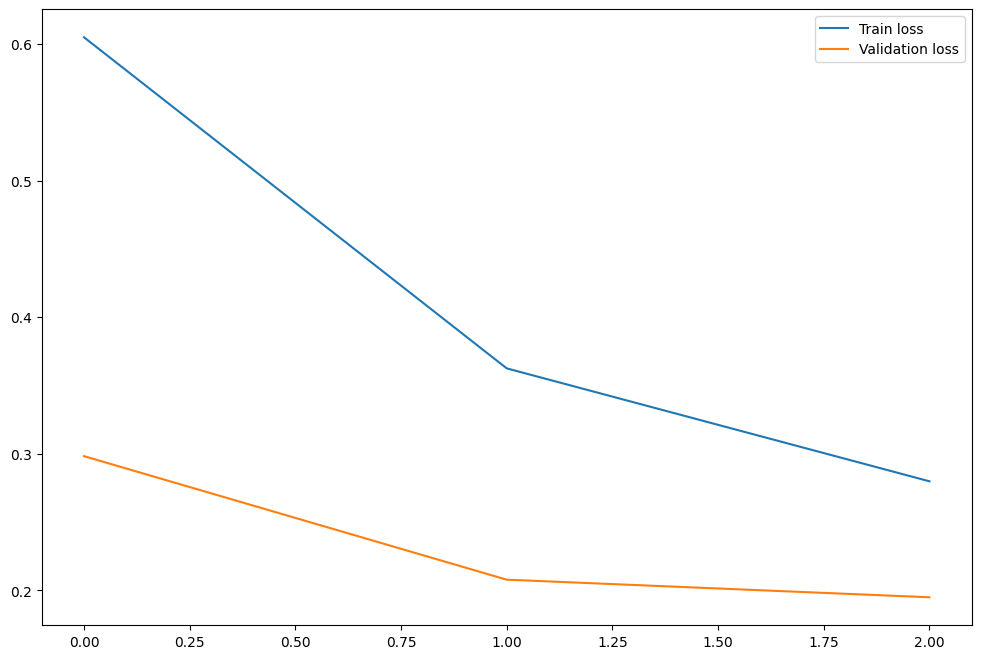

7/7 [==============================] - 0s 18ms/step
Example 1:
Expected output:
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0]
Obtained output:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


Example 2:
Expected output:
[1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Obtained output:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]




In [ ]:
train_X, train_Y = generate_X_Y(df, n=2048)

# Reshape the data to fit the model
train_X = train_X.reshape(-1, 9, 8, 1)

from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_temp, X_test, Y_temp, Y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=42)

# Split the temporary set into train and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_temp, Y_temp, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2


import matplotlib.pyplot as plt

# Larger batch size
batch_size = 256

# Train the model and record the training history
history = model.fit(train_X, train_Y, validation_split=0.2, epochs=3, validation_data=(X_val, Y_val), batch_size=batch_size, verbose=1)

# Plot the training and validation loss
plt.figure(figsize=(12, 8))
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

# Making predictions
pred_Y = model.predict(X_val)

# Converting probabilities to labels
pred_Y_labels = (pred_Y > 0.5).astype(int)

# Printing the first 2 examples
for i in range(2):
    print(f"Example {i+1}:")
    print("Expected output:")
    print(Y_val[i])
    print("Obtained output:")
    print(pred_Y_labels[i])
    print("\n")

# Train the model
#history = model.fit(train_X, train_Y, epochs=1500)

In [ ]:
# Making predictions
pred_Y = model.predict(test_X)

# Converting probabilities to labels
pred_Y_labels = (pred_Y > 0.5).astype(int)

# Printing the first 2 examples
for i in range(2):
    print(f"Example {i+1}:")
    print("Expected output:")
    print(test_Y[i])
    print("Obtained output:")
    print(pred_Y_labels[i])
    print("\n")

NameError: ignored

<Figure size 1200x800 with 0 Axes>

In [ ]:



from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(train_X, train_Y, epochs=1500, validation_split=0.2, callbacks=[early_stopping])




Epoch 1/1500
25/25 [==============================] - 0s 14ms/step - loss: 0.1639 - accuracy: 0.2700 - val_loss: 0.1566 - val_accuracy: 0.3100
Epoch 2/1500
25/25 [==============================] - 0s 6ms/step - loss: 0.1627 - accuracy: 0.2675 - val_loss: 0.1559 - val_accuracy: 0.2850
Epoch 3/1500
25/25 [==============================] - 0s 5ms/step - loss: 0.1616 - accuracy: 0.2925 - val_loss: 0.1543 - val_accuracy: 0.2650
Epoch 4/1500
25/25 [==============================] - 0s 6ms/step - loss: 0.1620 - accuracy: 0.2738 - val_loss: 0.1561 - val_accuracy: 0.2850
Epoch 5/1500
25/25 [==============================] - 0s 6ms/step - loss: 0.1597 - accuracy: 0.2750 - val_loss: 0.1549 - val_accuracy: 0.2600
Epoch 6/1500
25/25 [==============================] - 0s 6ms/step - loss: 0.1594 - accuracy: 0.2812 - val_loss: 0.1544 - val_accuracy: 0.2700
Epoch 7/1500
25/25 [==============================] - 0s 6ms/step - loss: 0.1597 - accuracy: 0.2800 - val_loss: 0.1553 - val_accuracy: 0.2850
Epoch